In [1]:
import os
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
os.chdir("D:/DataSet/csvdata/Face Expresion/")

In [3]:
a = os.listdir('test')

In [4]:
a

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [5]:
Image_Data = []
for i in a:
    path = os.path.join("train/",i)
    labe = a.index(i)
    
    for i in os.listdir(path):
        img_val = os.path.join(f"{path}/{i}")
        image = cv2.imread(img_val,0)
        reshap = cv2.resize(image,(29,29))
        ar = np.array(reshap)
        Image_Data.append([ar,labe])

In [6]:
random.shuffle(Image_Data)

In [7]:
X = []
Y = []
for img,label in Image_Data:
    X.append(img)
    Y.append(label)

In [8]:
X = np.array(X)
Y = np.array(Y)

In [9]:
X.shape

(28709, 29, 29)

In [10]:
Y.shape

(28709,)

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=2) 

In [12]:
xtrain.shape

(22967, 29, 29)

In [13]:
xtest.shape

(5742, 29, 29)

In [14]:
xtrain = xtrain.reshape(22967,29,29,1)
xtest = xtest.reshape(5742, 29, 29,1)

In [15]:
xtest.shape

(5742, 29, 29, 1)

In [16]:
ytrain.shape

(22967,)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
ytrain = to_categorical(ytrain,7)
ytest = to_categorical(ytest,7)

In [19]:
ytrain.shape

(22967, 7)

In [20]:
ytest.shape

(5742, 7)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Convolution2D,BatchNormalization,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
nn = Sequential()
nn.add(Convolution2D(32,(3,3),activation="relu",input_shape=(29,29,1)))
nn.add(MaxPool2D(2,2))

nn.add(Convolution2D(64,(3,3),activation="relu"))
nn.add(MaxPool2D(2,2))
nn.add(Dropout(0.23))


nn.add(Convolution2D(128,(3,3),activation="relu"))
nn.add(MaxPool2D(2,2))
nn.add(Dropout(0.23))


# nn.add(Convolution2D(265,(3,3),activation="relu"))
# nn.add(MaxPool2D(2,2))

nn.add(Flatten())
nn.add(Dense(256,activation="relu"))
nn.add(Dropout(0.23))

nn.add(Dense(64,activation="relu"))
nn.add(Dropout(0.23))

nn.add(Dense(7,activation="softmax"))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [23]:
es = EarlyStopping(patience=7,monitor='val_acc')
nn.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.0001),metrics=["accuracy"])
model = nn.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Train on 22967 samples, validate on 5742 samples
Epoch 1/100
22967/22967 [==============================] - 11s 467us/sample - loss: 3.0465 - acc: 0.1908 - val_loss: 1.8484 - val_acc: 0.2482
Epoch 2/100
22967/22967 [==============================] - 10s 415us/sample - loss: 1.8575 - acc: 0.2232 - val_loss: 1.8276 - val_acc: 0.2494
Epoch 3/100
22967/22967 [==============================] - 9s 409us/sample - loss: 1.8341 - acc: 0.2416 - val_loss: 1.8201 - val_acc: 0.2527
Epoch 4/100
22967/22967 [==============================] - 9s 412us/sample - loss: 1.8216 - acc: 0.2490 - val_loss: 1.8080 - val_acc: 0.2621
Epoch 5/100
22967/22967 [==============================] - 9s 414us/sample - loss: 1.8126 - acc: 0.2541 - val_loss: 1.8039 - val_acc: 0.2511
Epoch 6/100
22967/22967 [==============================] - 9s 412us/sample - loss: 1.8009 - acc: 0.2613 - val_loss: 1.7879 - val_acc: 0.2607
Epoch 7/100
22967/22967 [==============================] - 9s 412us/sample - loss: 1.7969 - acc: 0.2566

22967/22967 [==============================] - 9s 410us/sample - loss: 1.3491 - acc: 0.4902 - val_loss: 1.4703 - val_acc: 0.4455
Epoch 59/100
22967/22967 [==============================] - 9s 410us/sample - loss: 1.3419 - acc: 0.4921 - val_loss: 1.4610 - val_acc: 0.4460
Epoch 60/100
22967/22967 [==============================] - 9s 408us/sample - loss: 1.3314 - acc: 0.4977 - val_loss: 1.4551 - val_acc: 0.4500
Epoch 61/100
22967/22967 [==============================] - 9s 410us/sample - loss: 1.3282 - acc: 0.5005 - val_loss: 1.4559 - val_acc: 0.4507
Epoch 62/100
22967/22967 [==============================] - 9s 404us/sample - loss: 1.3227 - acc: 0.5019 - val_loss: 1.4595 - val_acc: 0.4495
Epoch 63/100
22967/22967 [==============================] - 9s 370us/sample - loss: 1.3132 - acc: 0.5045 - val_loss: 1.4568 - val_acc: 0.4538
Epoch 64/100
22967/22967 [==============================] - 10s 416us/sample - loss: 1.3092 - acc: 0.5069 - val_loss: 1.4608 - val_acc: 0.4476
Epoch 65/100
22967

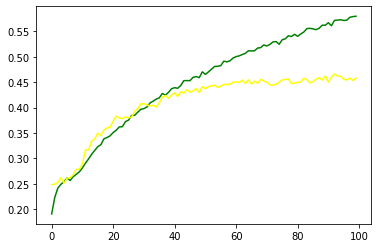

In [24]:
plt.plot(model.history["acc"],c="green")
plt.plot(model.history["val_acc"],c="yellow")
plt.show()

In [176]:
os.listdir()

['test', 'train']

In [34]:
os.listdir("test/neutral")

['PrivateTest_10086748.jpg',
 'PrivateTest_10767287.jpg',
 'PrivateTest_11123843.jpg',
 'PrivateTest_11164800.jpg',
 'PrivateTest_11239107.jpg',
 'PrivateTest_11262548.jpg',
 'PrivateTest_1129340.jpg',
 'PrivateTest_11724564.jpg',
 'PrivateTest_11752870.jpg',
 'PrivateTest_11775247.jpg',
 'PrivateTest_12091739.jpg',
 'PrivateTest_12201145.jpg',
 'PrivateTest_12208844.jpg',
 'PrivateTest_12372270.jpg',
 'PrivateTest_12810304.jpg',
 'PrivateTest_13422828.jpg',
 'PrivateTest_13501133.jpg',
 'PrivateTest_13654203.jpg',
 'PrivateTest_13684683.jpg',
 'PrivateTest_13726475.jpg',
 'PrivateTest_13762425.jpg',
 'PrivateTest_14408476.jpg',
 'PrivateTest_14704134.jpg',
 'PrivateTest_14728578.jpg',
 'PrivateTest_14785754.jpg',
 'PrivateTest_15353271.jpg',
 'PrivateTest_15444293.jpg',
 'PrivateTest_15583815.jpg',
 'PrivateTest_15728996.jpg',
 'PrivateTest_15847006.jpg',
 'PrivateTest_16117077.jpg',
 'PrivateTest_16463241.jpg',
 'PrivateTest_16513609.jpg',
 'PrivateTest_16611986.jpg',
 'PrivateTest_1

In [40]:
img = cv2.imread("test/neutral/PrivateTest_34827864.jpg",0)
img = cv2.resize(img,(29,29))
op = np.array(img)
cs = op.reshape(1,29,29,1)
mod = nn.predict(cs)

In [41]:
mod

array([[0.05277555, 0.00082224, 0.24032   , 0.02045122, 0.31460845,
        0.21578868, 0.15523386]], dtype=float32)

In [42]:
store_name = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [43]:
val = []
for i in mod:
    val.append(i)
data_fram = pd.DataFrame([store_name,val[0]]).T
data_fram.columns = ["Outlate","Output"]

# Final Output
op_final = data_fram.groupby('Output').max().tail(1).values[0][0]
op_final

'neutral'

In [44]:
data_fram

,Outlate,Output
0,angry,0.0527756
1,disgust,0.000822238
2,fear,0.24032
3,happy,0.0204512
4,neutral,0.314608
5,sad,0.215789
6,surprise,0.155234


In [45]:
nn.save("model_grey.h5")

In [197]:
json = nn.to_json()

In [200]:
model_json = nn.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)